In [40]:
import pandas as pd
from nltk.translate import bleu_score
from jiwer import wer
import seaborn as sns
import numpy as np

In [47]:
videos = pd.read_csv("video_list.csv")

In [48]:
videos.head()

,id,runtime,category,url,year,fellow_accuracy_rating,automl_confidence_avg,automl_confidence_min,automl_confidence_max
0,tobacco_rdz99d00,0:01:29,Advertising,https://archive.org/download/tobacco_rdz99d00/...,1966,NaN,0.765765,0.758432,0.773098
1,tobacco_amp91f00,0:05:25,Advertising,https://archive.org/download/tobacco_amp91f00/...,1994,NaN,0.844541,0.759544,0.912708
2,tobacco_xpu03f00,0:11:28,Advertising,https://archive.org/download/tobacco_xpu03f00/...,1961,NaN,0.813684,0.548756,0.910613
3,tobacco_qar62a00,0:12:13,Advertising,https://archive.org/download/tobacco_qar62a00/...,2001,NaN,0.856838,0.545134,0.912839
4,tobacco_ldo23e00,0:55:40,Advertising,https://archive.org/download/tobacco_ldo23e00/...,1957,NaN,0.839080,0.692930,0.912838


In [49]:
# delete once this is added - just messing up the loop right now 

videos = videos.loc[(videos.id != "tobacco_dlm09c00")]
videos['year'].loc[(videos.year > 3000)] = np.nan

In [50]:
# add transcripts into the dataframe

transcripts = pd.DataFrame(columns = ['id', 'computer_transcript'])  

# will add and join human transcripts here too when we have them 

for id in videos.id:
    #open text file in read mode
    text_file = open("computer_transcripts/%s.txt" % id, "r")
    
    #read whole file to a string
    text = text_file.read()
    
    #close file
    text_file.close()
    
    #add row to transcripts dataframe
    transcripts.loc[len(transcripts.index)] = [id, text]
    
videos = videos.merge(transcripts, on='id', how='left')
    

In [51]:
transcripts.head()

,id,computer_transcript
0,tobacco_rdz99d00,"then is the Newport a welcome place,never hush..."
1,tobacco_amp91f00,when I think about it most of my friends who s...
2,tobacco_xpu03f00,hardly folks if you have never smoked Raleigh ...
3,tobacco_qar62a00,"my name is Alberta,I just think okay if I don'..."
4,tobacco_ldo23e00,strike up a friendship with a new Parliament P...


In [52]:
videos

,id,runtime,category,url,year,fellow_accuracy_rating,automl_confidence_avg,automl_confidence_min,automl_confidence_max,computer_transcript
0,tobacco_rdz99d00,0:01:29,Advertising,https://archive.org/download/tobacco_rdz99d00/...,1966.0,NaN,0.765765,0.758432,0.773098,"then is the Newport a welcome place,never hush..."
1,tobacco_amp91f00,0:05:25,Advertising,https://archive.org/download/tobacco_amp91f00/...,1994.0,NaN,0.844541,0.759544,0.912708,when I think about it most of my friends who s...
2,tobacco_xpu03f00,0:11:28,Advertising,https://archive.org/download/tobacco_xpu03f00/...,1961.0,NaN,0.813684,0.548756,0.910613,hardly folks if you have never smoked Raleigh ...
3,tobacco_qar62a00,0:12:13,Advertising,https://archive.org/download/tobacco_qar62a00/...,2001.0,NaN,0.856838,0.545134,0.912839,"my name is Alberta,I just think okay if I don'..."
4,tobacco_ldo23e00,0:55:40,Advertising,https://archive.org/download/tobacco_ldo23e00/...,1957.0,NaN,0.839080,0.692930,0.912838,strike up a friendship with a new Parliament P...
5,tobacco_lez99d00,0:01:36,Advertising,https://archive.org/download/tobacco_lez99d00/...,1968.0,NaN,0.866173,0.845815,0.886530,he's an independent guy he likes to set his ow...
6,tobacco_tpu03f00,0:10:42,Advertising,https://archive.org/download/tobacco_tpu03f00/...,1966.0,NaN,0.793365,0.579098,0.904231,tackles aboard 38 men all around that get unde...
7,tobacco_nou03f00,0:06:38,Advertising,https://archive.org/download/tobacco_nou03f00/...,1961.0,NaN,0.763748,0.652610,0.904791,I hope twice's refresh don't fight and refresh...
8,tobacco_szy99d00,0:00:59,Advertising,https://archive.org/download/tobacco_szy99d00/...,1968.0,NaN,0.820326,0.820326,0.820326,Sarah Patron whose name was McNair as the barb...
9,tobacco_gxu03f00,0:13:10,Advertising,https://archive.org/download/tobacco_gxu03f00/...,1992.0,NaN,0.788386,0.353482,0.912838,"all these are all these are, that's why specia..."


In [53]:
# text cleaning and tokenizing

# remove commas, semicolons, dashes
videos["computer_transcript"] = videos["computer_transcript"].str.replace(";"," ")
videos["computer_transcript"] = videos["computer_transcript"].str.replace(":"," ")
videos["computer_transcript"] = videos["computer_transcript"].str.replace(","," ")
videos["computer_transcript"] = videos["computer_transcript"].str.replace("-"," ")

# convert all sentence enders to periods
videos["computer_transcript"] = videos["computer_transcript"].str.replace("!"," ")
videos["computer_transcript"] = videos["computer_transcript"].str.replace("?"," ")

# replace multiple periods with one period
videos["computer_transcript"] = videos["computer_transcript"].str.replace("\.{2,}"," ")

# turn the transcript strings into lists of words 
# split by spaces
videos['computer_transcript'] = videos['computer_transcript'].str.split(' ')

/var/folders/88/g7gb2zlj44lfv2_8p54ms0880000gn/T/ipykernel_2538/1607419947.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  videos["computer_transcript"] = videos["computer_transcript"].str.replace("?"," ")
/var/folders/88/g7gb2zlj44lfv2_8p54ms0880000gn/T/ipykernel_2538/1607419947.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  videos["computer_transcript"] = videos["computer_transcript"].str.replace("\.{2,}"," ")


In [54]:
videos.computer_transcript.head()

0    [then, is, the, Newport, a, welcome, place, ne...
1    [when, I, think, about, it, most, of, my, frie...
2    [hardly, folks, if, you, have, never, smoked, ...
3    [my, name, is, Alberta, I, just, think, okay, ...
4    [strike, up, a, friendship, with, a, new, Parl...
Name: computer_transcript, dtype: object

<AxesSubplot:xlabel='automl_confidence_avg', ylabel='year'>

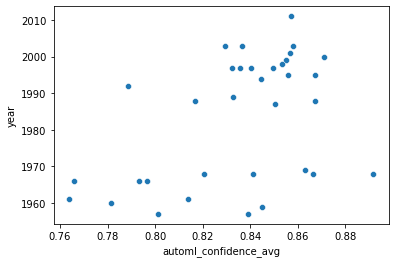

In [55]:
sns.scatterplot(x = videos['automl_confidence_avg'], y = videos['year'])

In [61]:
videos.corr()

,year,fellow_accuracy_rating,automl_confidence_avg,automl_confidence_min,automl_confidence_max
year,1.000000,NaN,0.452521,-0.230631,0.379984
fellow_accuracy_rating,NaN,NaN,NaN,NaN,NaN
automl_confidence_avg,0.452521,NaN,1.000000,0.328962,0.379545
automl_confidence_min,-0.230631,NaN,0.328962,1.000000,-0.417511
automl_confidence_max,0.379984,NaN,0.379545,-0.417511,1.000000
